<a href="https://colab.research.google.com/github/Sarvatra-98/RFR_Cars/blob/master/RFR_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset consists of over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. 
Using Random forest Regression the prices of the vehicle is predicted on the basis of certain parameters

[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

[Dataset](https://www.kaggle.com/orgesleka/used-cars-database)

In [4]:
! pip install -q kaggle


In [5]:
from google.colab import files

In [ ]:
files.upload()

In [7]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets list

In [11]:
!kaggle datasets download -d orgesleka/used-cars-database

 52% 9.00M/17.3M [00:00<00:00, 23.0MB/s]
100% 17.3M/17.3M [00:00<00:00, 31.8MB/s]


In [12]:
!ls 

kaggle.json  sample_data  used-cars-database.zip


In [13]:
import zipfile
zip_ref = zipfile.ZipFile("used-cars-database.zip", 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
cars=pd.read_csv('/content/files/autos.csv',encoding='ISO-8859-1')


In [14]:
import pandas as pd
import numpy as np
cars=pd.read_csv('/content/files/autos.csv',encoding='ISO-8859-1')
cars.shape

(371528, 20)

Data cleaning 


In [15]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [16]:
cars

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [17]:
cars=cars.drop(["name","dateCrawled","dateCreated","lastSeen","nrOfPictures","offerType","seller","postalCode","gearbox"] , axis=1 )

In [18]:
cars

,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,100,golf,150000,6,diesel,volkswagen,NaN


In [19]:
cars

,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,100,golf,150000,6,diesel,volkswagen,NaN


In [20]:
cars.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [21]:
cars["notRepairedDamage"].fillna("nein",inplace = True)

In [22]:
cars["fuelType"].fillna("diesel",inplace = True)

In [23]:
len(cars["model"].unique())

252

In [24]:
cars["model"].unique()[0]

'golf'

In [25]:
cars["model"].fillna("golf",inplace =True)


In [26]:
cars["model"]

0                golf
1                golf
2               grand
3                golf
4               fabia
             ...     
371523           golf
371524         fortwo
371525    transporter
371526           golf
371527        m_reihe
Name: model, Length: 371528, dtype: object

In [27]:
vehicleType = cars["vehicleType"].unique()
fuelType = cars["fuelType"].unique()
vehicleType = np.delete(vehicleType,0)

In [28]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if cars[(cars.vehicleType == j) & (cars.fuelType == i)].shape[0] > m :
            m = cars[(cars.vehicleType == j) & (cars.fuelType == i)].shape[0]
            d[i] = j

In [29]:
for i in fuelType :
    cars.loc[(cars.fuelType == i) & (cars.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [30]:
cars["vehicleType"]

0         kleinwagen
1              coupe
2                suv
3         kleinwagen
4         kleinwagen
             ...    
371523         kombi
371524        cabrio
371525           bus
371526         kombi
371527     limousine
Name: vehicleType, Length: 371528, dtype: object

In [31]:
cars.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

Data Visualization 


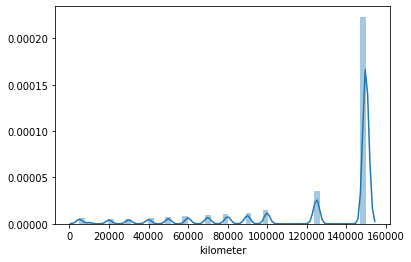

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(cars['kilometer'])
plt.show()


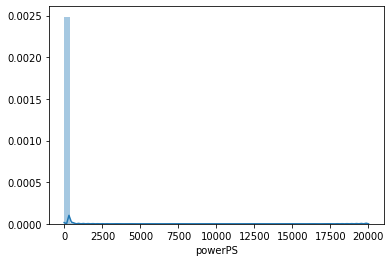

In [36]:
sns.distplot(cars['powerPS'])
plt.show()

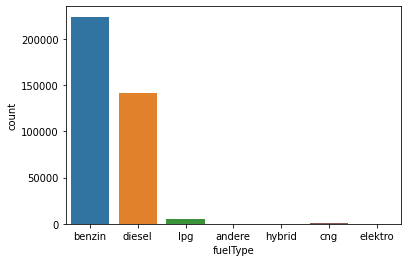

In [42]:
sns.countplot(x='fuelType', data=cars)

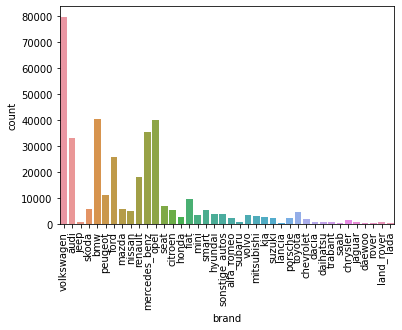

In [44]:
sns.countplot(x='brand', data=cars)
plt.xticks(rotation='vertical')
plt.show()

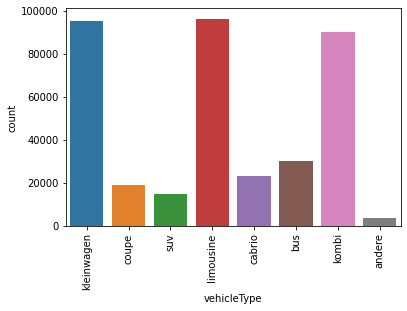

In [45]:
sns.countplot(x='vehicleType', data=cars)
plt.xticks(rotation='vertical')
plt.show()

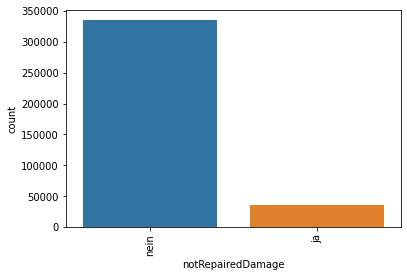

In [48]:
sns.countplot(x='notRepairedDamage', data=cars)
plt.xticks(rotation='vertical')
plt.show()

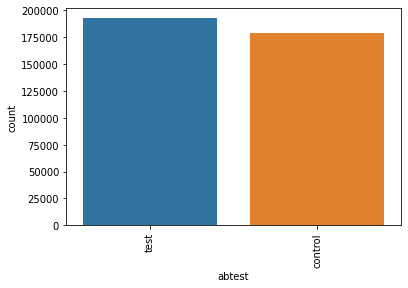

In [49]:
sns.countplot(x='abtest', data=cars)
plt.xticks(rotation='vertical')
plt.show()

Data Modeling and Prediction


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
cars["vehicleType"] =LabelEncoder().fit_transform(cars["vehicleType"])
cars["fuelType"] =LabelEncoder().fit_transform(cars["fuelType"])
cars["notRepairedDamage"] =LabelEncoder().fit_transform(cars["notRepairedDamage"])
cars["brand"] =LabelEncoder().fit_transform(cars["brand"])
cars["model"] =LabelEncoder().fit_transform(cars["model"])
cars["abtest"] =LabelEncoder().fit_transform(cars["abtest"])

In [ ]:
cars =cars[(cars.yearOfRegistration < 2017)  & (cars.yearOfRegistration > 1950)]
cars = cars[(cars.price > 100) & (cars.price < 200000) ]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
y  = cars["price"]
x =  cars.drop("price",axis=1)

In [ ]:
cars

,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,1,4,1993,0,118,150000,0,1,38,1
1,18300,1,3,2011,190,118,125000,5,3,1,0
2,9800,1,7,2004,163,119,125000,8,3,14,1
3,1500,1,4,2001,75,118,150000,6,1,38,1
4,3600,1,4,2008,69,103,90000,7,3,31,1
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,1,5,2005,0,118,20000,1,3,33,1
371524,1199,1,2,2000,101,108,125000,3,1,32,1
371525,9200,1,1,1996,102,225,150000,3,3,38,1
371526,3400,1,5,2002,100,118,150000,6,3,38,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_test, y_test)

0.8179497836739544

Accuracy is 81.79%